# Experiments

In [1]:
from w_l import kWL
import networkx as nx
import matplotlib.pyplot as plt
from partial_symmetries import PartialSymmetries, draw_inverse_monoid, draw_monoid_for_subgraph, PAut_level, PAut
from networkx.readwrite import json_graph
from partial_permutation import PartialPermutation
from collections import defaultdict
import itertools
from sage.all import *
from graph import Graph
# from sage.graphs import Graph as SageGraph
from igraph import Graph as IGraph

from typing import Dict
import copy
from graph import Graph

from asymmetric_finder import ASYM_G_DB_PATH, find_asym_d, upsert_graph, get_graphs_n_d, get_graph_by_id
from ast import literal_eval
import networkx as nx
import random
from itertools import combinations
import matplotlib.pyplot as plt
import multiprocessing
import sqlite3
import logging


%load_ext autoreload
%autoreload 2

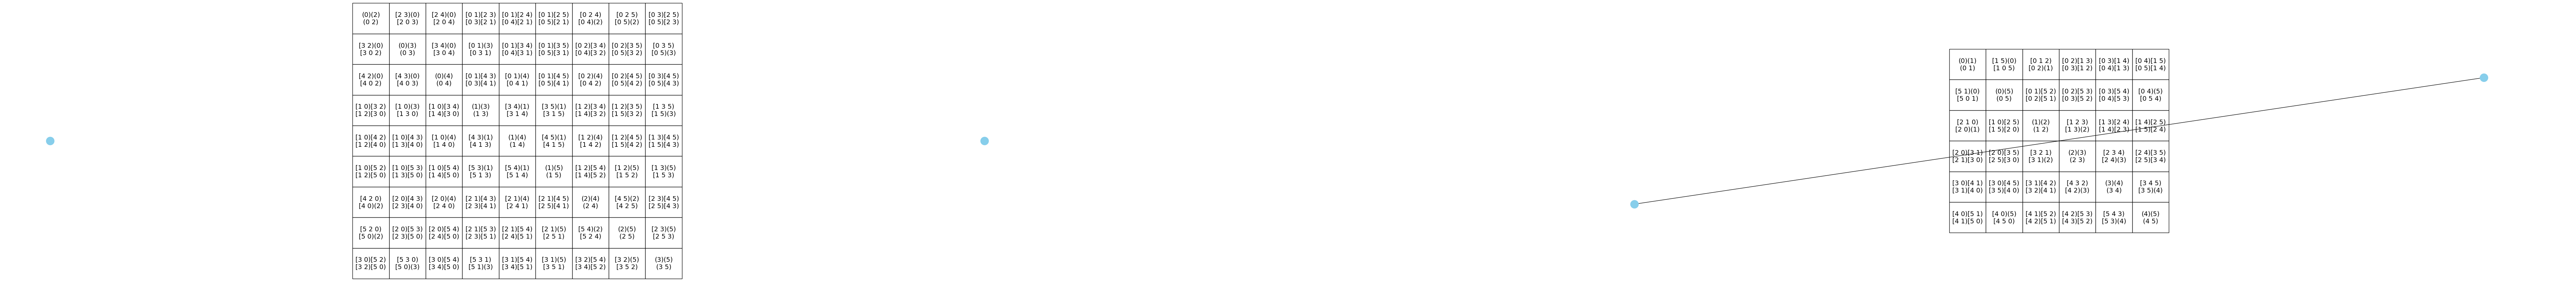

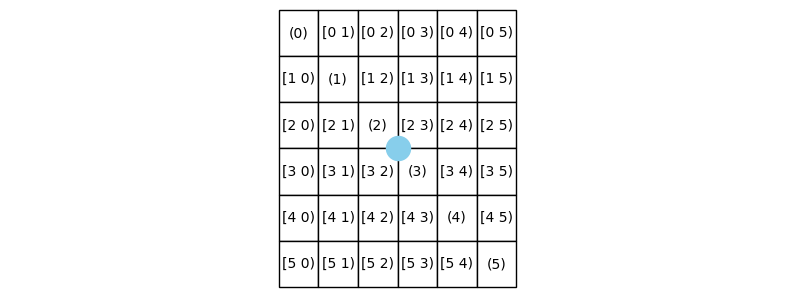

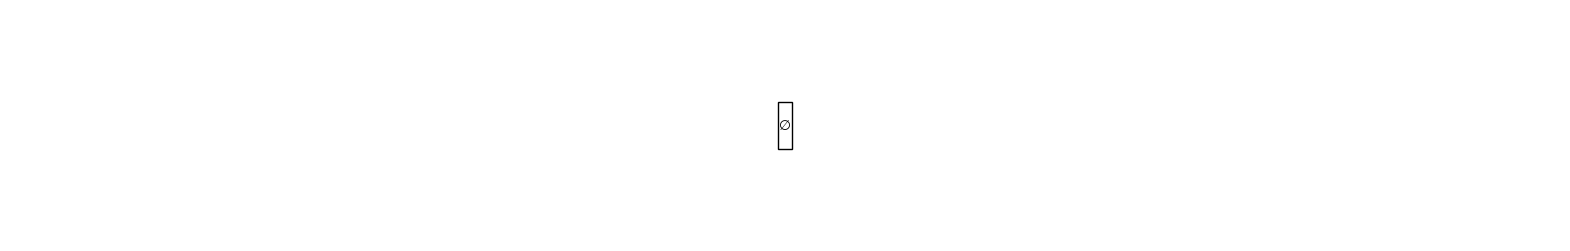

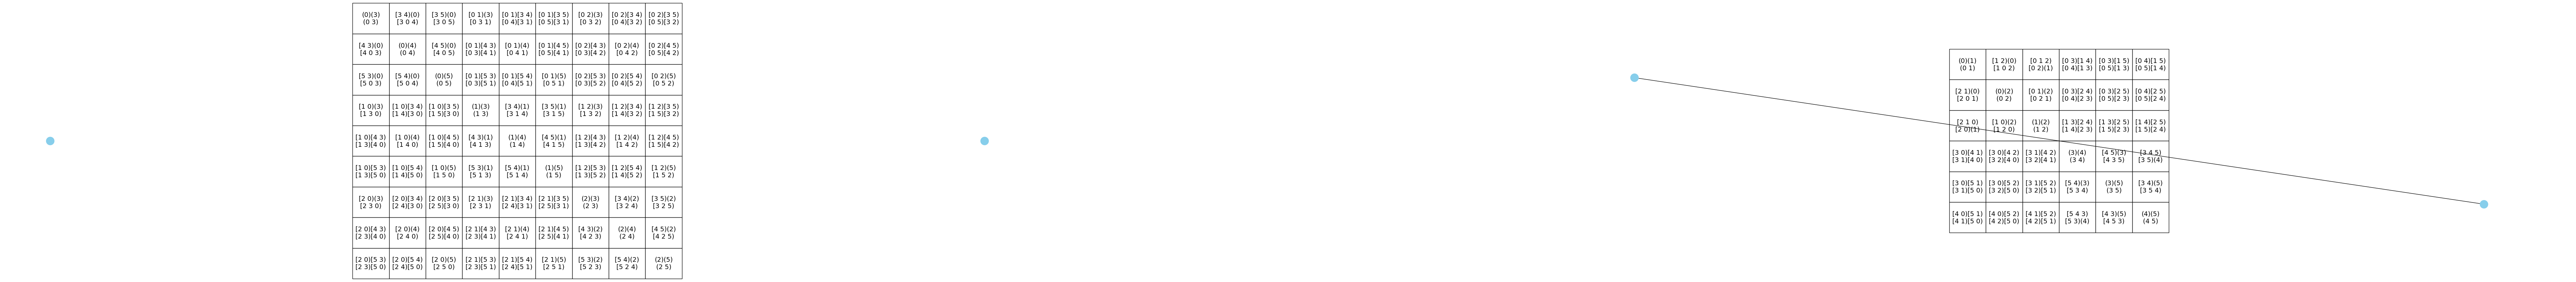

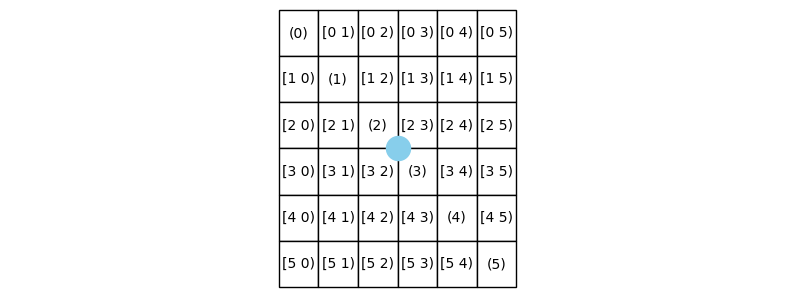

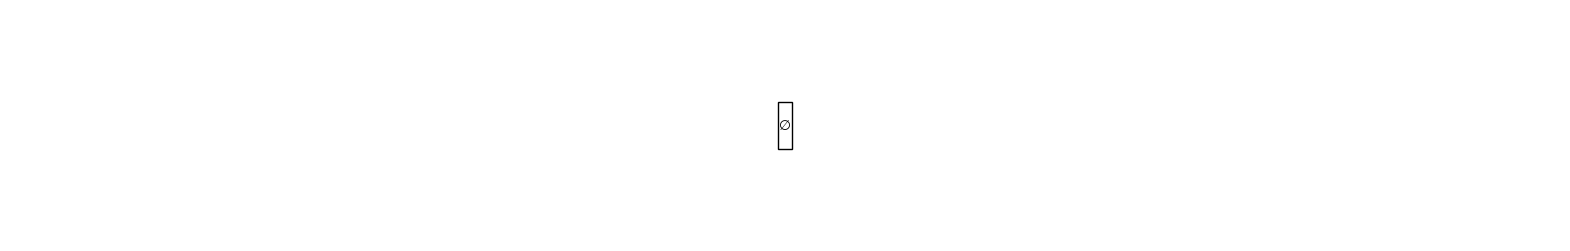

In [10]:
g = nx.Graph({0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5:[0]}) # 6-cycle
G1 = Graph(g)

# g = nx.Graph({0: [3, 5], 1: [4, 5], 2: [4], 3: [0, 5], 4: [1, 2], 5: [0, 1, 3]}) # 3- iterations WL, 2-iterations compositions of pas
# g = nx.Graph({0: [3, 6], 1: [4, 5, 6], 2: [4, 5], 3: [0, 6], 4: [1, 2], 5: [1, 2], 6: [0, 1, 3]} )
# g = nx.Graph({0: [1], 1: [2], 2: [3], 3: [4,0], 4: []})  # diamond with dangling edge
g = nx.Graph({0: [1], 1: [2], 2: [0], 3: [4], 4: [5], 5:[3]}) # 2x triangles
G2 = Graph(g)

draw_inverse_monoid(G1, depths=(4,5,6))
draw_inverse_monoid(G2, depths=(4,5,6))

{0: [1, 2], 1: [0, 2], 2: [1, 0], 3: [4, 5], 4: [3, 5], 5: [4, 3]}


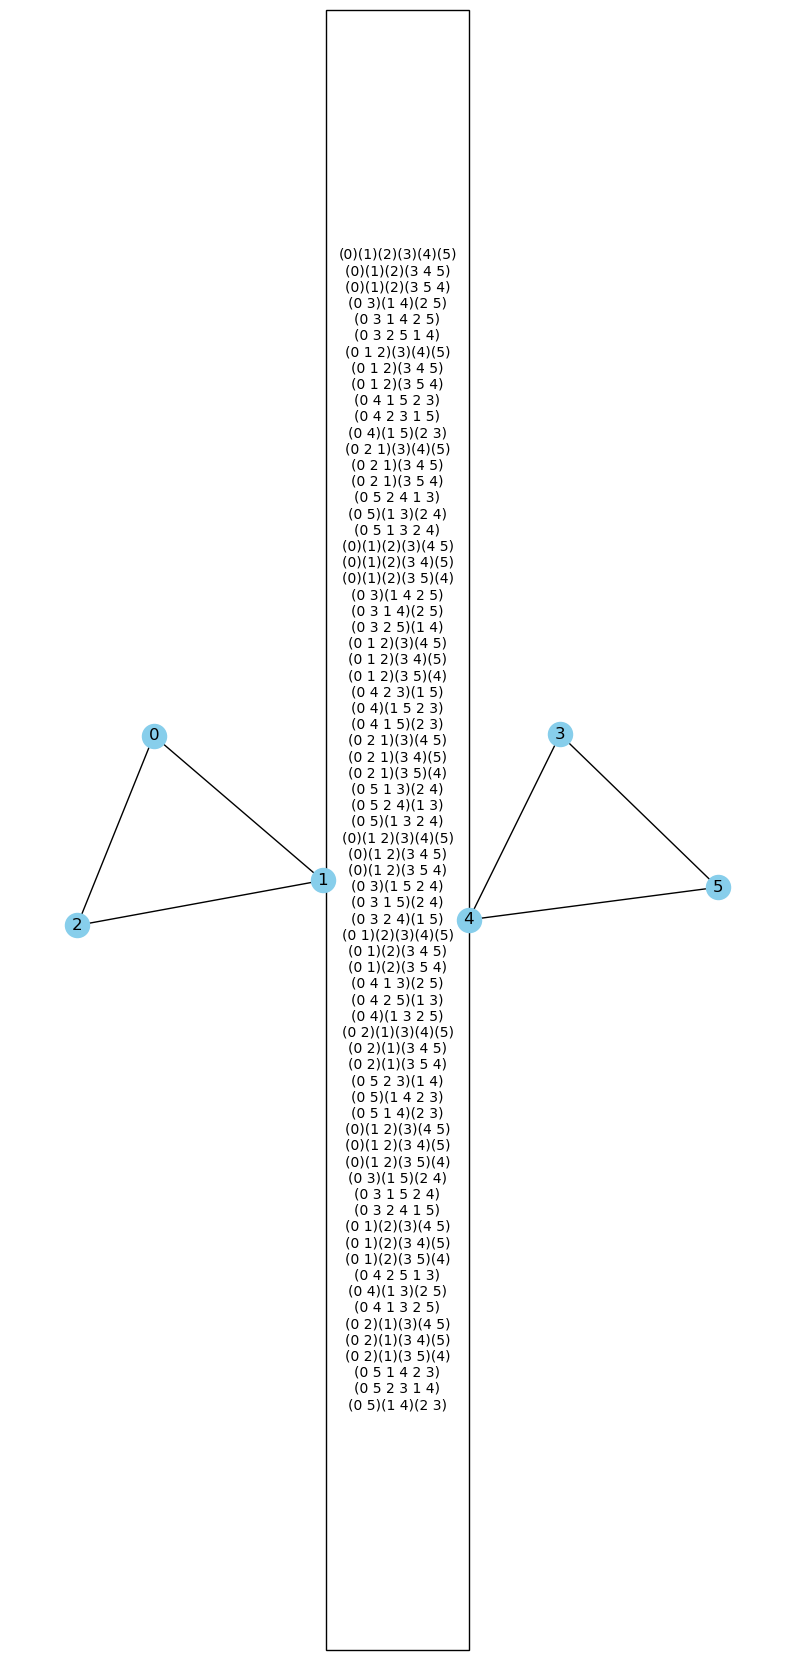

{0: ['0'], 1: ['0'], 2: ['0'], 3: ['0'], 4: ['0'], 5: ['0']}
0 ['0', '0']
1 ['0', '0']
2 ['0', '0']
3 ['0', '0']
4 ['0', '0']
5 ['0', '0']
Iteration 0: 1 different colors
{0: ['0', '0', '0'], 1: ['0', '0', '0'], 2: ['0', '0', '0'], 3: ['0', '0', '0'], 4: ['0', '0', '0'], 5: ['0', '0', '0']}
0 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']
1 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']
2 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']
3 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']
4 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']
5 ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9f

In [2]:
k = 1

# g = nx.gnp_random_graph(5, 0.6)
# g = nx.Graph({0: [1], 1: [2], 2: [3], 3: [4], 4: []}) # 5-path
# g = nx.Graph({0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5:[0]}) # 6-cycle
# g = nx.Graph({0: [3, 5], 1: [4, 5], 2: [4], 3: [0, 5], 4: [1, 2], 5: [0, 1, 3]}) # 3- iterations WL, 2-iterations compositions of pas
# g = nx.Graph({0: [3, 6], 1: [4, 5, 6], 2: [4, 5], 3: [0, 6], 4: [1, 2], 5: [1, 2], 6: [0, 1, 3]} )
# g = nx.Graph({0: [1], 1: [2], 2: [3], 3: [4,0], 4: []})  # diamond with dangling edge
g = nx.Graph({0: [1], 1: [2], 2: [0], 3: [4], 4: [5], 5:[3]}) # 2x triangles
G = Graph(g)
print(nx.to_dict_of_lists(g))
# nx.draw(G.to_networkx(), with_labels=True)
# plt.show()
draw_inverse_monoid(G,depths=[0])


# pAs, colors = build_D_class(G, show_info={"extensions":False,"coloring":True})
kWL_colors = kWL(g, k, verbose=True)
print(kWL_colors)
# colors = combine_colors_into_k_pairs(G, colors, k)
# print(colors)
# print(len(set(colors.values())))

In [3]:
from collections import defaultdict
import copy
import itertools
import hashlib
import w_l
from sage.graphs.graph import Graph as SageGraph

def build_D_class(G, reduce_to_coloring=True, show_info={"extensions":False,"coloring":True}):

    def complete_pA(pA, G):
        # pA is a partial isomorphism
        # return true if pA is complete
        # else return possible extension
        
        # take all remaining pairs of vertices, u,v, such that u is not in domain,
        # v is not in image, such that u is adjacent to w in domain, and v is adjacent to w in image
        # for all w belonging to domain of pA
        # if there are no such pairs, then pA is complete
        extension_pairs = set()
        # for u, v in itertools.combinations(G.nodes(), 2):
        # O(n^2) time
        for u, v in [(u, v) for u, v in perm_pairs]:
        # for u in G.nodes():
        #     for v in G.nodes():
                # if (u in pA.dom or v in pA.ran) or adjacency_condition(G, pA, u_index, v_index, label_to_index):
                if (u not in pA.dom and v not in pA.ran) and all([G.are_connected(u, w) == G.are_connected(v, pA._to(w)) for w in pA.dom]):
                    extension_pairs.add((u,v))
        return list(extension_pairs)     
    
    def compute_extensions(pAs, k, G, reduce_to_coloring, show_info):
        complete = True
        n_ext = 0
        if reduce_to_coloring:
            all_extensions_same_colors = set()

        for pA in pAs[k]:
            extensions = complete_pA(pA, G)

            if extensions:
                print(f"{k+1}-extensions of {pA}: ", extensions) if show_info["extensions"] else None
                n_ext += len(extensions)
                complete = False
                for u,v in extensions:
                    if reduce_to_coloring: all_extensions_same_colors.add((u,v))
                    pA_ext = PartialPermutation(tuple(list(pA.dom) + [u]), tuple(list(pA.ran) + [v]))    
                    pAs[k+1].add(pA_ext)

        for pA_id in itertools.combinations(G.nodes(), k+1):
            pA = PartialPermutation(pA_id, pA_id)
            pAs[k+1].add(pA)
            n_ext += 1

        return n_ext, complete, all_extensions_same_colors
    
      
    p = PartialSymmetries(G)
    # 0 case if no edges, then just run the original algorithm and return
    # 1 Add all empty partial isomorphism, and all partial isomorphism of rank 1
    pAs = defaultdict(set)
    for k in range(0, 2):
        # for iso_class in list(p.find_isomorphism_classes(k)):
        isomorphism_classes = p.find_isomorphism_classes(k)
        for iso_class in isomorphism_classes:
            iso_class.create_d_class()
            # print(iso_class.size())
            print(iso_class.pAs) if show_info["extensions"] else None
            print(set(iso_class.pAs)) if show_info["extensions"] else None
            pAs[k].update(iso_class.pAs)
                    # pAs[k].extend(p_)
        print(len(pAs[k])) if show_info["extensions"] else None
    print(pAs) if show_info["extensions"] else None
    
    combs_pairs = list(itertools.combinations(G.nodes(), 2))
    perm_pairs = combs_pairs + [(v, u) for u, v in itertools.combinations(G.nodes(), 2)]
    
    # 2 For each pair of adjacent vertices, construct all partial isomorphisms
    # O(n^4)
    for u, v in combs_pairs:  # O(n^2)
        for u_, v_ in perm_pairs: # O(n^2)
            u_v_adj = G.are_connected(u, v)
            u__v__adj = G.are_connected(u_, v_)
            # if (u_v_adj and u__v__adj) or (not u_v_adj and not u__v__adj):
            if (u_v_adj == u__v__adj): # skusme vybudovat len z hran a nie z nehran, co to spravi
                pA = PartialPermutation((u,v), (u_,v_))
                pAs[2].add(pA)

    print(len(pAs[2])) if show_info["extensions"] else None
   
    # 4 set k =2 
    k = 2
    
    if reduce_to_coloring:
        colors = {v: ['0'] for v in G.nodes()}
        old_colors = copy.deepcopy(colors)
        color_history = defaultdict(dict)
    
    # all_extensions = defaultdict(list)        
    
    while True:
        
        n_ext, complete, all_extensions_same_colors = compute_extensions(pAs, k, G, reduce_to_coloring, show_info)

        if n_ext == 0: # not possible to extend, no new partial identities
            break
        
        if reduce_to_coloring:
            # the vertices u, v receive different colors at level k if no partial isomorphism of rank k can be extended by adding u -> v
            # contraposition: if there exists a partial isomorphism of rank k that can be extended by adding u -> v, then u and v receive the same color at level k
            
            all_extensions_same_colors_indices = set([(u, v) for u, v in all_extensions_same_colors]).union(set([(v, u) for u, v in all_extensions_same_colors]))
            diff_colors = set(perm_pairs) - all_extensions_same_colors_indices
            
            # delete all pairs that are just reordering of the same pair
            # Convert each pair to a frozenset before adding it to the set
            # diff_colors = set(frozenset(pair) for pair in diff_colors) # TODO: tomuto sa viem vyhnut  kvoli cyklu nizsie
            
            # if n_ext ==1 and show_info["extensions"]:
            #     print("all extensions, indices: ", all_extensions_same_colors_indices) 
            #     print(diff_colors)
            
            colors = {v: ['0'] for v in G.nodes()}
            
            # determine color classes
            for u, v in diff_colors:
                # pair = sorted([u,v])
                # u,v=pair 
                colors[u].append(str(u)+","+str(v)) 
                colors[v].append(str(v)+","+str(u)) 
                
            for u in G.nodes():
                colors[u].sort()
                colors[u] = [hashlib.sha224("".join(colors[u]).encode('utf-8')).hexdigest()]
            
            buckets_colors = []
            for u, v in all_extensions_same_colors: # tu je asi chyba
                # colors[u] = colors[v]
                
                are_added = False
                for i, bucket in enumerate(buckets_colors):
                    if u in bucket or v in bucket:
                        buckets_colors[i].add(v)
                        buckets_colors[i].add(u)
                        are_added = True
                        break
                if not are_added:
                    buckets_colors.append(set([u, v]))
                    
            # if the bucket have intersection, then merge them
            for i, bucket_1 in enumerate(buckets_colors):
                for j, bucket_2 in enumerate(buckets_colors):
                    if i != j and len(bucket_1.intersection(bucket_2)) > 0:
                            buckets_colors[i] = buckets_colors[i].union(buckets_colors[j])
                            buckets_colors[j] = set()
                            
            buckets_colors = [bucket for bucket in buckets_colors if len(bucket) > 0]
            
            # merge all colors from the same bucket
                    
            for bucket in buckets_colors:
                b = sorted(list(bucket))
                c_b = [hashlib.sha224("".join([colors[u][0] for u in b]).encode('utf-8')).hexdigest()]
                for u in b:
                    colors[u] = c_b
        
            print("k: ", k , colors, sep=' ') if show_info["coloring"] else None
            color_history[k] = copy.deepcopy(colors)

        print("k: ", k, "|k|: ", len(pAs[k])) if show_info["extensions"] else None
        print("n_ext: ", n_ext) if show_info["extensions"] else None
        if complete:
            break
            
        k += 1
    
    # print(all_extensions) if show_info["extensions"] else None
    
    # return the colors dictionary with k that had the most colors (value classes)
    # Assuming colors_dict is a dictionary where the keys are values of k and the values are color dictionaries
    most_colors = max(color_history.items(), key=lambda item: len(set(value for values in item[1].values() for value in values)))[1]
    
    print(pAs) if show_info["extensions"] else None
    return pAs, colors if reduce_to_coloring else pAs
    # print(len(pAs))
    

In [ ]:
pAs, coloring = build_D_class(G, reduce_to_coloring=True, show_info={"extensions":False,"coloring":True})
# print("n partial isomorphisms of rank n-1: ", len(pAs[n-1]))

for key in pAs.keys():
    print(key, " : ", pAs[key], " : ", len(pAs[key]))

In [4]:
def groups(dict2):
        
    groups_dict2 = {}
    for key, value in dict2.items():
        value_as_tuples = sorted(list(value.items()))
        groups_dict2.setdefault(tuple(value_as_tuples), []).append(key)
    
    for i in groups_dict2.keys():
        groups_dict2[i] = sorted(groups_dict2[i])
    
    g_d2 = sorted(groups_dict2.values())
    return g_d2

def compare_dicts(dict1, dict2):
    
    
    
    groups_dict1 = {}
    for key, value in dict1.items():
        groups_dict1.setdefault(tuple(value), []).append(key)
    
    for i in groups_dict1.keys():
        groups_dict1[i] = sorted(groups_dict1[i])
        
    groups_dict2 = {}
    for key, value in dict2.items():
        # print(value)
        value_as_tuples = sorted(list(value.items()))
        groups_dict2.setdefault(tuple(value_as_tuples), []).append(key)
    
    for i in groups_dict2.keys():
        groups_dict2[i] = sorted(groups_dict2[i])
    
    
    # # Group the keys by their values for each dictionary
    # groups1 = {}
    # for key, value in dict1.items():
    #     groups1.setdefault(tuple(value), []).append(key)
    # groups2 = {}
    # for key, value in dict2.items():
    #     groups2.setdefault(tuple(value), []).append(key)

    # # Sort the keys in each group
    # for value in groups1.values():
    #     value.sort()
    # for value in groups2.values():
    #     value.sort()
    
    g_d1 = sorted(groups_dict1.values())
    g_d2 = sorted(groups_dict2.values())
    
    
    

    # Check if the groups are the same for both dictionaries
    return g_d1 == g_d2, g_d1, g_d2


## color with extensions 

In [5]:
def complete_pA(pA, G, check_iso = False):
    # pA is a partial isomorphism
    # return true if pA is complete
    # else return possible extension
    
    # take all remaining pairs of vertices, u,v, such that u is not in domain,
    # v is not in image, such that u is adjacent to w in domain, and v is adjacent to w in image
    # for all w belonging to domain of pA
    # if there are no such pairs, then pA is complete
    extension_pairs = set()
    combs_pairs = list(itertools.combinations(G.nodes(), 2))
    perm_pairs = combs_pairs + [(v, u) for u, v in itertools.combinations(G.nodes(), 2)]
    
    # O(n^2) time
    for u, v in [(u, v) for u, v in perm_pairs]:
            if (u not in pA.dom and v not in pA.ran) and all([G.are_connected(u, w) == G.are_connected(v, pA._to(w)) for w in pA.dom]):
                extension_pairs.add((u,v))
                if check_iso: 
                    break
    return list(extension_pairs)     

def compute_extensions(pAs, k, G, check_iso = False):
    
    pAs_ = []
    for pA in pAs:
        extensions = complete_pA(pA, G)

        if extensions:
            if check_iso:
                return True
            for u,v in extensions:
                pA_ext = PartialPermutation(tuple(list(pA.dom) + [u]), tuple(list(pA.ran) + [v]))    
                pAs_.append(pA_ext)
        else:
            if check_iso:
                return True

    for pA_id in itertools.combinations(G.nodes(), k+1):
        pA = PartialPermutation(pA_id, pA_id)
        pAs_.append(pA)

    return pAs_

In [33]:
import networkx as nx
# from sage.graphs.graph import Graph
from collections import defaultdict
import copy

# Compute partial automorphisms

# Identify partial automorphisms of rank 2

def partial_automorphism_colors(G):
        

    # Count occurrences of each vertex in rank 2 partial automorphisms
    vertex_counts = defaultdict(lambda: defaultdict(int))

    # for p in rank_2_partial_automorphisms:
    #     for vertex in p.dom:
    #         vertex_counts[vertex] += 1


    n = len(G)
    p = PartialSymmetries(G)
    k_vertex_induced_subgraphs = list([p.get_data_for_k_vertex_subgraphs(2, string=False, json_output=False, structured=False)][0])

    for i, pAs in enumerate(k_vertex_induced_subgraphs):
        for pA in pAs:
            for v in pA.dom:
                vertex_counts[v][2] += 1

    # all_pas = set([pA for pAs in k_vertex_induced_subgraphs for pA in pAs])
    all_pas = set([pA for pAs in k_vertex_induced_subgraphs for pA in pAs])
    # print(all_pas, len(all_pas))
    # print(vertex_counts)

    # all_pas_mul = [pA_1 * pA_2 if pA_1.is_compatible(pA_2) else None for pAs in k_vertex_induced_subgraphs for pA_2 in pAs for pA_1 in pAs]
    # all_pas_mul = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)] + [pA_2 * pA_1 for pA_2 in all_pas for pA_1 in all_pas if pA_2.is_compatible(pA_1)])
    # all_pas_mul = [pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]
    
    
    n_color_classes = 0
    
    all_pas_ = copy.deepcopy(all_pas)
    while True:
    
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]) # does not work
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]) # does not work
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2) and not pA_1.is_identity() and not pA_2.is_identity()]) # does not work
        
        
        # all_pas = set([pA_1.union(pA_2) for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2) and len(pA_1.union(pA_2)) >= 1]) # does not work
        
        # all_pas__ = set()
        
        # # all_pas__ = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas]).union(set([pA_2 * pA_1 for pA_2 in all_pas for pA_1 in all_pas])) 
        # for pA_1 in all_pas_: 
        #     for pA_2 in all_pas_:
        #         if pA_1.is_compatible(pA_2):
        #             union = pA_1.union(pA_2)
        #             # if len(union) >= 1:
        #             all_pas__.add(union)
        
        # all_pas_ = all_pas__             
        
        # all_pas = compute_extensions(all_pas_, 2, G, check_iso = False) # does not work
        
        # print(all_pas)
        
        # all_pas = all_pas.union(all_pas_) 
        # print(len(all_pas))

        # vertex_counts = defaultdict(lambda: defaultdict(int))
        for pA in all_pas:
            # if pA is None:
            #     continue
            k = len(pA)
            for v in pA.dom:
                vertex_counts[v][k] += 1
            for v in pA.ran:
                vertex_counts[v][k] += 1
            
            # if len(pA) == 2:
            # if len(pA) == 1:
            #     for v in pA.dom:
            #         vertex_counts[v][1] += 1
            # if len(pA) == 0:
            #     for v in G.nodes():
            #         vertex_counts[v][0] += 1

        # print(vertex_counts)
        grps = groups(vertex_counts)
        # print(grps)
        n_color_classes_ = len(grps)
        # print(n_color_classes_)
        if n_color_classes == n_color_classes_:
            print('----------------')
            print()
            return vertex_counts
        
        n_color_classes = n_color_classes_
        break    
    
    return vertex_counts
    


# same, g_d1, g_d2 = compare_dicts(kWL_colors[0], vertex_counts)


# all_pas_mul = [pA_1 * pA_2 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)]
# # all_pas_mul = [pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)]
# # all_pas_mul = set([pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)])
# # all_pas_mul = set([pA_1 * pA_2 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)] + [pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_2.is_compatible(pA_1)])
# # print(all_pas_mul, len(all_pas_mul))

# vertex_counts = defaultdict(lambda: defaultdict(int))
# for pA in all_pas_mul:
#     # if pA is None:
#     #     continue
#     if len(pA) == 2:
#         for v in pA.dom:
#             vertex_counts[v][2] += 1
#     if len(pA) == 1:
#         for v in pA.dom:
#             vertex_counts[v][1] += 1
#     # if len(pA) == 0:
#     #     vertex_counts[v][0] += 1

# print(vertex_counts)

# # Print the counts for each D-class
# for d_class, counts in d_class_counts.items():
#     print(f"D-class {d_class}:")
#     for vertex, count in counts.items():
#         print(f"  Vertex {vertex}: {count} partial automorphisms of rank 2")

# # Print the size of the group of units
# print(libgap.Size(group_of_units))

## color with multiplications on common domain

In [ ]:
import networkx as nx
# from sage.graphs.graph import Graph
from collections import defaultdict
import copy

# Compute partial automorphisms

# Identify partial automorphisms of rank 2

def partial_automorphism_colors(G):
        

    # Count occurrences of each vertex in rank 2 partial automorphisms
    vertex_counts = defaultdict(lambda: defaultdict(int))
    vertex_counts = defaultdict(lambda: defaultdict(set))

    # for p in rank_2_partial_automorphisms:
    #     for vertex in p.dom:
    #         vertex_counts[vertex] += 1

    g = G.networkx_graph()
    n = len(G)
    p = PartialSymmetries(G)
    k_vertex_induced_subgraphs = list([p.get_data_for_k_vertex_subgraphs(2, string=False, json_output=False, structured=False)][0])

    for i, pAs in enumerate(k_vertex_induced_subgraphs):
        for pA in pAs:
            subg = g.subgraph(pA.dom)
            g6 = nx.to_graph6_bytes(subg)
            for v in pA.dom:
                # vertex_counts[v][str(g6)] += 1
                vertex_counts[v][str(g6)] = vertex_counts[v][str(g6)] + set(pA.dom) - v

    # all_pas = set([pA for pAs in k_vertex_induced_subgraphs for pA in pAs])
    all_pas = set([pA for pAs in k_vertex_induced_subgraphs for pA in pAs])
    # print(all_pas, len(all_pas))
    # print(vertex_counts)

    # all_pas_mul = [pA_1 * pA_2 if pA_1.is_compatible(pA_2) else None for pAs in k_vertex_induced_subgraphs for pA_2 in pAs for pA_1 in pAs]
    # all_pas_mul = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)] + [pA_2 * pA_1 for pA_2 in all_pas for pA_1 in all_pas if pA_2.is_compatible(pA_1)])
    # all_pas_mul = [pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]
    
    
    n_color_classes = 0
    
    all_pas_ = copy.deepcopy(all_pas)
    while True:
    
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]) # does not work
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2)]) # does not work
        # all_pas = set([pA_1 * pA_2 for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2) and not pA_1.is_identity() and not pA_2.is_identity()]) # does not work
        
        
        # all_pas = set([pA_1.union(pA_2) for pA_2 in all_pas for pA_1 in all_pas if pA_1.is_compatible(pA_2) and len(pA_1.union(pA_2)) >= 1]) # does not work
        
        # all_pas__ = set()
        
        # all_pas__ = set([pA_1 * pA_2 for pA_2 in all_pas_ for pA_1 in all_pas_ if len(set(pA_1.dom).union(set(pA_2.dom)).union(set(pA_1.ran)) - set(pA_2.ran)) == 1]) 
        # all_pas__ = set([pA_1 * pA_2 for pA_2 in all_pas_ for pA_1 in all_pas_ if pA_1.dom == pA_2.dom)).union(set(pA_1.ran)) - set(pA_2.ran)) == 1]) 
        all_pas__ = set([pA_1 * pA_2 for pA_2 in all_pas_ for pA_1 in all_pas_]) 
        # all_pas__ = set([pA_1 * pA_2 for pA_2 in all_pas_ for pA_1 in all_pas_]) # does not work
        # for pA_1 in all_pas_: 
        #     for pA_2 in all_pas_:
                
                
        #         if pA_1.is_compatible(pA_2):
        #             union = pA_1.union(pA_2)
        #             # if len(union) >= 1:
        #             all_pas__.add(union)
        
        all_pas_ = all_pas__             
        
        # all_pas = compute_extensions(all_pas_, 2, G, check_iso = False) # does not work
        
        # print(all_pas)
        
        # all_pas = all_pas.union(all_pas_) 
        # print(len(all_pas))

        # vertex_counts = defaultdict(lambda: defaultdict(int))
        for pA in all_pas_:
            # if pA is None:
            #     continue
            # k = len(pA)
            subg = g.subgraph(pA.dom)
            g6 = nx.to_graph6_bytes(subg)
            for v in pA.dom:
                if pA._to(v) == v:
                    vertex_counts[v][str(g6)] += 1
            # for v in pA.ran:
            #     vertex_counts[v][k] += 1
            
            # if len(pA) == 2:
            # if len(pA) == 1:
            #     for v in pA.dom:
            #         vertex_counts[v][1] += 1
            # if len(pA) == 0:
            #     for v in G.nodes():
            #         vertex_counts[v][0] += 1

        print(vertex_counts)
        grps = groups(vertex_counts)
        print(grps)
        n_color_classes_ = len(grps)
        # print(n_color_classes_)
        if n_color_classes == n_color_classes_:
            # print('----------------')
            # print()
            return vertex_counts
        
        n_color_classes = n_color_classes_

same, g_d1, g_d2 = compare_dicts(kWL_colors[0], vertex_counts)


# all_pas_mul = [pA_1 * pA_2 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)]
# # all_pas_mul = [pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)]
# # all_pas_mul = set([pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)])
# # all_pas_mul = set([pA_1 * pA_2 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_1.is_compatible(pA_2)] + [pA_2 * pA_1 for pA_2 in all_pas_mul for pA_1 in all_pas_mul if pA_2.is_compatible(pA_1)])
# # print(all_pas_mul, len(all_pas_mul))

# vertex_counts = defaultdict(lambda: defaultdict(int))
# for pA in all_pas_mul:
#     # if pA is None:
#     #     continue
#     if len(pA) == 2:
#         for v in pA.dom:
#             vertex_counts[v][2] += 1
#     if len(pA) == 1:
#         for v in pA.dom:
#             vertex_counts[v][1] += 1
#     # if len(pA) == 0:
#     #     vertex_counts[v][0] += 1

# print(vertex_counts)

# # Print the counts for each D-class
# for d_class, counts in d_class_counts.items():
#     print(f"D-class {d_class}:")
#     for vertex, count in counts.items():
#         print(f"  Vertex {vertex}: {count} partial automorphisms of rank 2")

# # Print the size of the group of units
# print(libgap.Size(group_of_units))

In [265]:
print(all_pas,len(all_pas))

[(0)(1), (0 1), [1 2)(0), [1 0 2), [1 4)(0), [1 0 4), [1 5)(0), [1 0 5), [0 1 2), [0 2)(1), [0 1 3), [0 3)(1), [0 2)[1 3), [0 3)[1 2), [0 2)[1 6), [0 6)[1 2), [0 3)[1 4), [0 4)[1 3), [0 3)[1 5), [0 5)[1 3), [0 4)[1 5), [0 5)[1 4), [0 4)[1 6), [0 6)[1 4), [0 5)[1 6), [0 6)[1 5), [2 1)(0), [2 0 1), (0)(2), (0 2), [2 4)(0), [2 0 4), [2 5)(0), [2 0 5), [0 1)(2), [0 2 1), [0 1)[2 3), [0 3)[2 1), [0 2 3), [0 3)(2), [0 2 6), [0 6)(2), [0 3)[2 4), [0 4)[2 3), [0 3)[2 5), [0 5)[2 3), [0 4)[2 5), [0 5)[2 4), [0 4)[2 6), [0 6)[2 4), [0 5)[2 6), [0 6)[2 5), [4 1)(0), [4 0 1), [4 2)(0), [4 0 2), (0)(4), (0 4), [4 5)(0), [4 0 5), [0 1)[4 2), [0 2)[4 1), [0 1)[4 3), [0 3)[4 1), [0 2)[4 3), [0 3)[4 2), [0 2)[4 6), [0 6)[4 2), [0 3)(4), [0 4 3), [0 3)[4 5), [0 5)[4 3), [0 4 5), [0 5)(4), [0 4 6), [0 6)(4), [0 5)[4 6), [0 6)[4 5), [5 1)(0), [5 0 1), [5 2)(0), [5 0 2), [5 4)(0), [5 0 4), (0)(5), (0 5), [0 1)[5 2), [0 2)[5 1), [0 1)[5 3), [0 3)[5 1), [0 2)[5 3), [0 3)[5 2), [0 2)[5 6), [0 6)[5 2), [0 3)[5

In [288]:
vertex_counts = partial_automorphism_colors(Graph(G_different_colors[0]))
print(vertex_counts)

767
[[0, 1, 5], [2], [3, 4]]
3
822
[[0, 1, 5], [2], [3, 4]]
3
----------------

defaultdict(<function partial_automorphism_colors.<locals>.<lambda> at 0x7fbeb64791c0>, {0: defaultdict(<class 'int'>, {2: 370, 4: 570, 3: 672, 5: 60, 6: 2}), 1: defaultdict(<class 'int'>, {2: 370, 4: 570, 3: 672, 5: 60, 6: 2}), 2: defaultdict(<class 'int'>, {2: 390, 4: 594, 3: 688, 5: 60, 6: 2}), 3: defaultdict(<class 'int'>, {2: 380, 4: 576, 3: 652, 5: 60, 6: 2}), 4: defaultdict(<class 'int'>, {2: 380, 4: 576, 3: 652, 5: 60, 6: 2}), 5: defaultdict(<class 'int'>, {2: 370, 4: 570, 3: 672, 5: 60, 6: 2})})


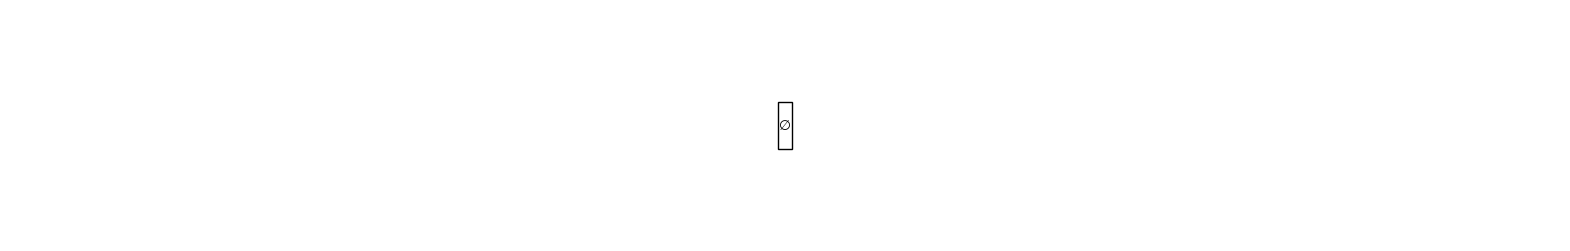

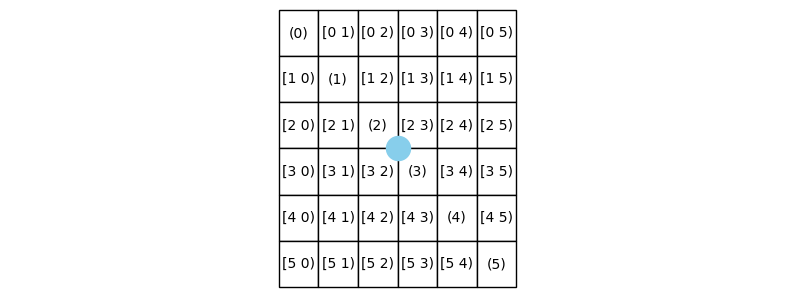

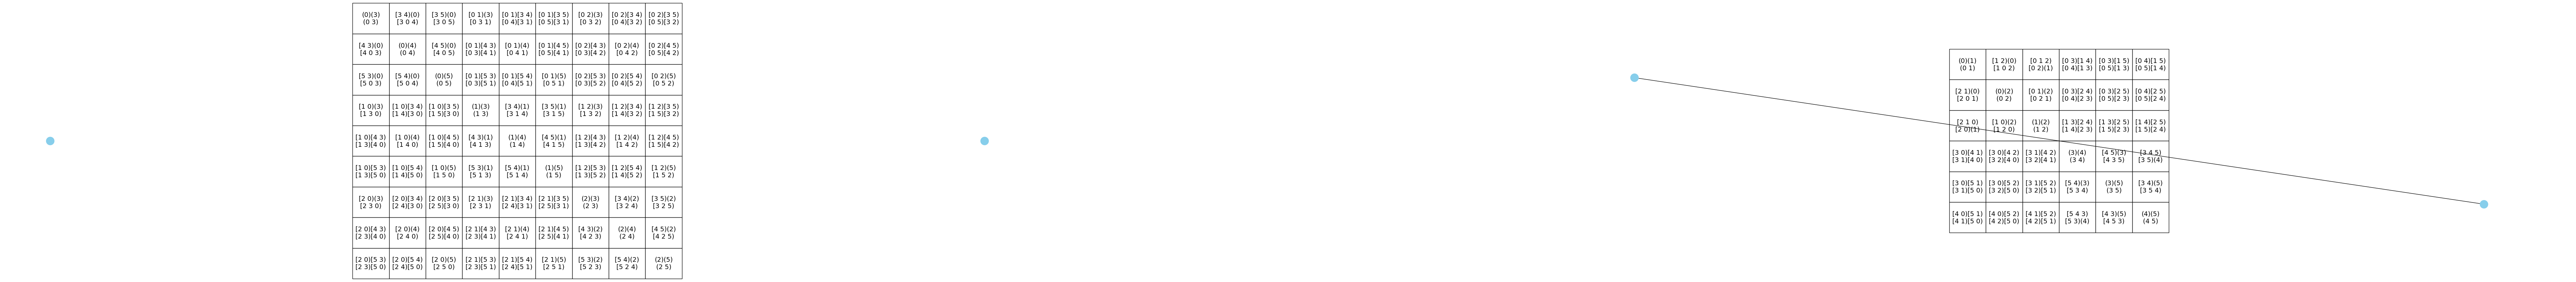

In [8]:
draw_inverse_monoid(G,depths=[len(G), len(G)-1, len(G)-2])

In [193]:
groups(vertex_counts)

[[0], [1, 2], [3], [4], [5]]

In [163]:
print(same, g_d1, g_d2)

True [[0, 3], [1], [2], [4, 5], [6]] [[0, 3], [1], [2], [4, 5], [6]]


In [ ]:
all_pas_mul = [pA_1 * pA_2 for pAs in k_vertex_induced_subgraphs for pA_2 in pAs for pA_1 in pAs if pA_1.is_compatible(pA_2)]

In [195]:
G_different_colors_ = G_different_colors

------------------
defaultdict(<function partial_automorphism_colors.<locals>.<lambda> at 0x7f9c1f588400>, {0: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1}), 1: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1}), 2: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1}), 3: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1}), 4: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1}), 5: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 175, "b'>>graph6<<@\\n'": 1})})
[[0, 1, 2, 3, 4, 5]]
defaultdict(<function partial_automorphism_colors.<locals>.<lambda> at 0x7f9c1f588400>, {0: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 200, "b'>>graph6<<@\\n'": 2}), 1: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 200, "b'>>graph6<<@\\n'": 2}), 2: defaultdict(<class 'int'>, {"b'>>graph6<<A?\\n'": 200, "b'>>graph6<<@\\n'": 2}), 3: defaultdict(<class 'in

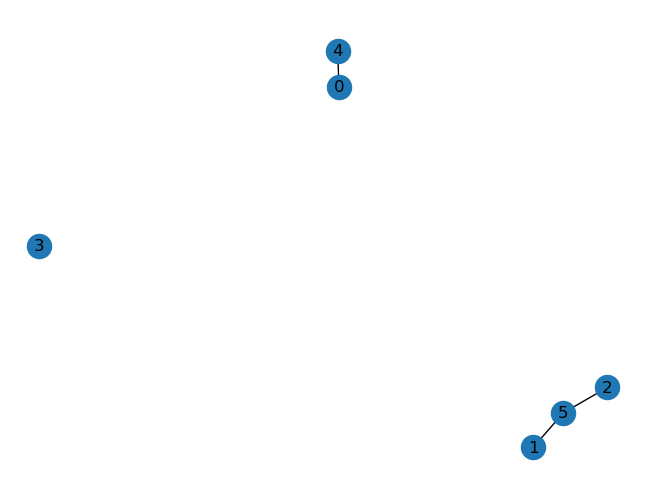

------------------


In [12]:

count = 0
G_different_colors = []

for i in range(6,7):
    with open(f'/home/sage/repository/partial_symmetries/partial_automorphisms_graphs/all_graphs/graphs{i}.g6', 'r') as f:
        for line in f:
            print('------------------')
            g = nx.from_graph6_bytes(line.strip().encode())
    
    # for g in G_different_colors:
            count += 1   
            
            if count >= 10:
                break
            
            G = Graph(g)

            colors_wl, canonical_form_wl = kWL(g, 1, verbose=False,)
            vertex_counts = partial_automorphism_colors(G)
            
            same, g_d1, g_d2 = compare_dicts(colors_wl, vertex_counts)

            if count % 10 == 0:
                print(count)
            
            if not same:
                G_different_colors.append(g)
                print(g_d1,g_d2)
                nx.draw(g, with_labels=True)
                plt.show()
        

In [225]:
print(all_pas)

[(0)(1), (0 1), [1 2)(0), [1 0 2), [1 4)(0), [1 0 4), [1 5)(0), [1 0 5), [0 1 2), [0 2)(1), [0 1 3), [0 3)(1), [0 2)[1 3), [0 3)[1 2), [0 2)[1 6), [0 6)[1 2), [0 3)[1 4), [0 4)[1 3), [0 3)[1 5), [0 5)[1 3), [0 4)[1 5), [0 5)[1 4), [0 4)[1 6), [0 6)[1 4), [0 5)[1 6), [0 6)[1 5), [2 1)(0), [2 0 1), (0)(2), (0 2), [2 4)(0), [2 0 4), [2 5)(0), [2 0 5), [0 1)(2), [0 2 1), [0 1)[2 3), [0 3)[2 1), [0 2 3), [0 3)(2), [0 2 6), [0 6)(2), [0 3)[2 4), [0 4)[2 3), [0 3)[2 5), [0 5)[2 3), [0 4)[2 5), [0 5)[2 4), [0 4)[2 6), [0 6)[2 4), [0 5)[2 6), [0 6)[2 5), [4 1)(0), [4 0 1), [4 2)(0), [4 0 2), (0)(4), (0 4), [4 5)(0), [4 0 5), [0 1)[4 2), [0 2)[4 1), [0 1)[4 3), [0 3)[4 1), [0 2)[4 3), [0 3)[4 2), [0 2)[4 6), [0 6)[4 2), [0 3)(4), [0 4 3), [0 3)[4 5), [0 5)[4 3), [0 4 5), [0 5)(4), [0 4 6), [0 6)(4), [0 5)[4 6), [0 6)[4 5), [5 1)(0), [5 0 1), [5 2)(0), [5 0 2), [5 4)(0), [5 0 4), (0)(5), (0 5), [0 1)[5 2), [0 2)[5 1), [0 1)[5 3), [0 3)[5 1), [0 2)[5 3), [0 3)[5 2), [0 2)[5 6), [0 6)[5 2), [0 3)[5

In [223]:
print(count)

11


In [1]:
import copy
import pprint
import itertools
import hashlib
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def one_WL(G, verbose=False):
    # 1. 
    colors = {n: ["0"] for n in G.nodes()}
    old_colors = copy.deepcopy(colors)
    # 2.
    for i in range(len(G.nodes())):
        # 3.
        for n in G.nodes():
            neigh_colors = [old_colors[nb][0] for nb in G.neighbors(n)]
            colors[n].extend(neigh_colors)
            colors[n].sort()
        # print number of different colors
        if verbose:
            print(f'Iteration {i}: {len(set([item for sublist in colors.values() for item in sublist]))} different colors')
            print(colors)
        # 4. Update with the hash
        colors = {c: [hashlib.sha224("".join(colors[c]).encode('utf-8')).hexdigest()] for c in colors}

        # is it stable?
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        old_colors = copy.deepcopy(colors)

            
    canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    if verbose:
        print(colors)
        print(f'Canonical Form Found: \n {canonical_form} \n')
    return colors, canonical_form
    
    
def base_WL(G_, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
    G, n_k_sets, n_k_reversed, V_k_all = n_set(G_)
    # print(n_k_reversed)
    # print(n_k_sets)
    # 1. 
    colors = initial_colors_func(G,n_k_sets)
    print(colors)
    
    for n_k in n_k_sets:
        colors[n_k_reversed[n_k]] = colors[n_k]
    
    
    old_colors = copy.deepcopy(colors)
    # 2.
    for i in range(len(n_k_sets)):
        
        # 3.
        for n_k in n_k_sets:
            
            # either this
            c_n_k = dict()
            for k_i in range(k):
                c_n_k[k_i] = [old_colors[nb][0] for nb in find_neighbors_func(G, V_k_all, n_k, k_i)]
            for k_i in range(k):
                colors[n_k].extend(c_n_k[k_i])
            
            # or this
            
            # neigh_colors = [old_colors[nb][0] for nb in find_neighbors_func(G, V_k_all, n_k, k)]
            # colors[n_k].extend(neigh_colors)
            
            colors[n_k].sort()
        
        for n_k in n_k_sets:
            colors[n_k_reversed[n_k]] = colors[n_k]

        # print number of different colors
        if verbose:
            print(f'Iteration {i}: {len(set([item for sublist in colors.values() for item in sublist]))} different colors')
        
        # 4. Update with the hash
        colors = {c: [hashlib.sha224("".join(colors[c]).encode('utf-8')).hexdigest()] for c in colors}
        # print(colors)
        
        # check which pairs changed color this iteration
        changed_colors = set()
        # for q in find_neighbors_func(G, V_k_all, n_k, k):
        for p,q in itertools.combinations(n_k_sets,2):
            if old_colors[p] == old_colors[q] and colors[p] != colors[q]:
                # changed_colors.add((p, q, old_colors[p][0], old_colors[q][0], colors[p][0], colors[q][0]))
                changed_colors.add((p, q))
        print(f"{i}-th iteration: ", changed_colors, len(changed_colors))
        
        
        # draw_graph(G, colors, i)
        # is it stable?
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        
        old_colors = copy.deepcopy(colors)
    # canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    canonical_form = sorted(Counter([item for sublist in (colors[n_k] for n_k in n_k_sets) for item in sublist]).items())
    if verbose:
        # for node in n:
            # print(f'Node {node}, Neighbors: {list(find_neighbors_func(G, n, node))}')
        print(colors)
        print(f'Canonical Form Found: \n {canonical_form} \n')
        
    
    return colors, canonical_form



In [3]:
def kWL(G, k, verbose=False):
    def n_set(G):
        V = list(G.nodes())
        V_k = [comb for comb in itertools.combinations(V, k)]
        V_k_reversed = {comb: tuple(reversed(comb)) for comb in V_k}
        V_k_all = V_k + list(V_k_reversed.values())
        return G, V_k, V_k_reversed, V_k_all
    def set_initial_colors(G, n):
        initial_colors = {i: [nx.weisfeiler_lehman_graph_hash(G.subgraph(i))] for i in n}
        # print(initial_colors)
        return initial_colors
    
    def find_neighbors(G, V_k, v_k, i):
        # find all nodes that are one edge away (so everything except ith position) from v_k in V_k,
        # print(v_k, i, sep=": ")
        # neighbors = []
        # for n in V_k:
        #     # if len(set(n) - set(v_k)) == 1 and (v_k[i] != n[i]): #or v_k[len(v_k)-i-1] != n[i]): 
        #     if  v_k[:i] == n[:i]  and v_k[i] != n[i] and (i+1 >= len(v_k) or v_k[i+1:] == n[i+1:]): #or v_k[len(v_k)-i-1] != n[i]): 
        #         # yield n
        #         neighbors.append(n)
        # print(neighbors)
        # return neighbors
        
        # either this
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(v_k)])) == 1]
        # or this
        # return [n for n in V_k if len(set(n) - set(V_k[V_k.index(v_k)])) == 1 and (v_k[i] != n[i])]
    return one_WL(G, verbose) if k == 1 else base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)
    # return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

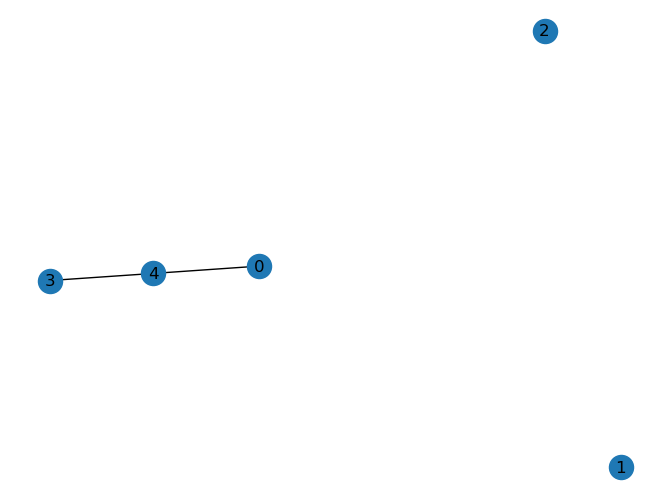

Iteration 0: 1 different colors
{0: ['0', '0'], 1: ['0'], 2: ['0'], 3: ['0', '0'], 4: ['0', '0', '0']}
Iteration 1: 3 different colors
{0: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 1: ['dfd5f9139a820075df69d7895015360b76d0360f3d4b77a845689614'], 2: ['dfd5f9139a820075df69d7895015360b76d0360f3d4b77a845689614'], 3: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 4: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', '5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']}
Converged at iteration 1!
{0: ['35df1d05ae285a191a0ea4efbe5b58378ca15effa981f0ea8e43d116'], 1: ['c7b0a5bb5e6f4ee1cdee7398dfdd70b8bd45258e0727a2d2a708a9c0'], 2: ['c7b0a5bb5e6f4ee1cdee7398dfdd70b8bd45258e0727a2d2a708a9c0'], 3: ['35df1d05ae285a191a0ea4efbe5b58378ca15effa981f0ea8e43d116'], 4: ['f172a3d

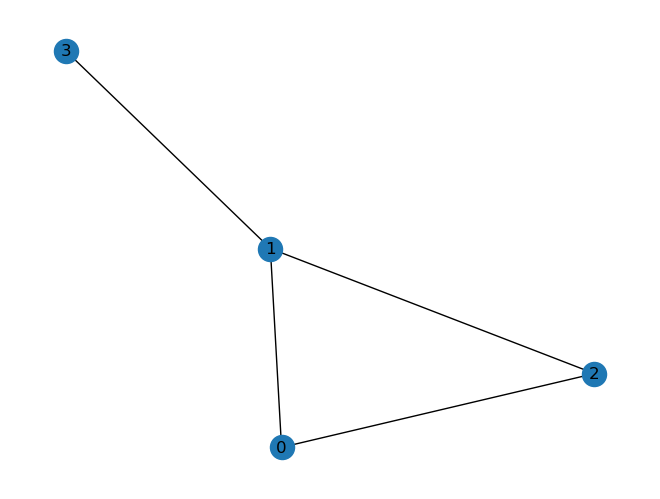

Iteration 0: 1 different colors
{0: ['0', '0', '0'], 1: ['0', '0', '0', '0'], 2: ['0', '0', '0'], 3: ['0', '0']}
Iteration 1: 3 different colors
{0: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 1: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 2: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 3: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d']}
Converged at iteration 1!
{0: ['06122fb572767ef97f6d387a101fba842031583a65c55d1b66ec952b'], 1: ['a33d73850d4bcd196

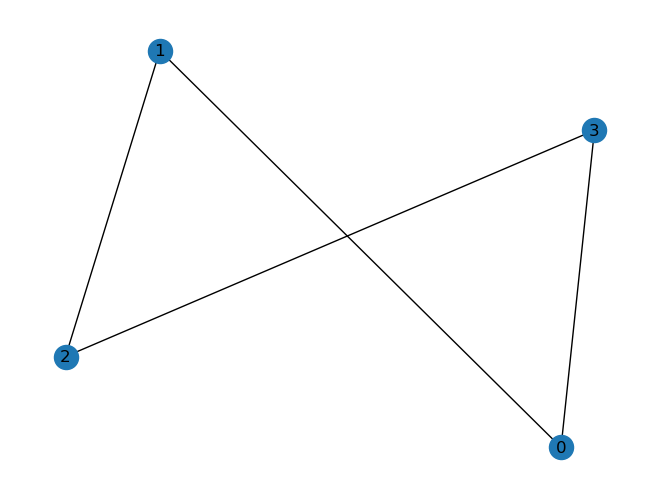

Iteration 0: 1 different colors
{0: ['0', '0', '0'], 1: ['0', '0', '0'], 2: ['0', '0', '0'], 3: ['0', '0', '0']}
Iteration 1: 1 different colors
{0: ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 1: ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 2: ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 3: ['c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']}
Converged at iteration 1!
{0: ['d3ed0f1ad8acfd128f3cb4ca8189d5c0c1f9bf03c5441eee5ec1ad48'], 1: ['d3ed0f1ad8acfd128

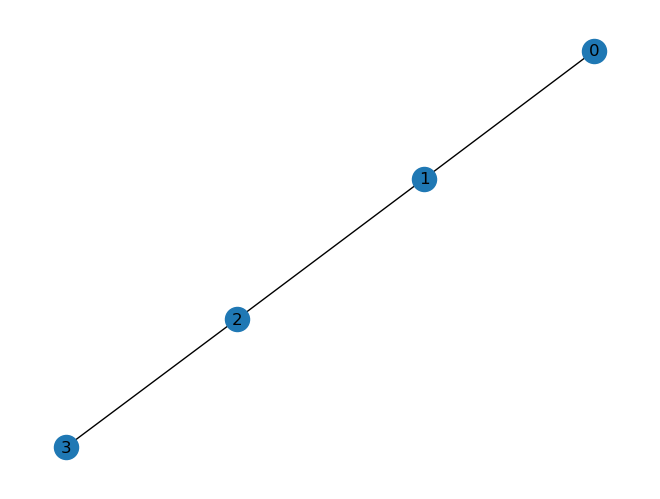

Iteration 0: 1 different colors
{0: ['0', '0'], 1: ['0', '0', '0'], 2: ['0', '0', '0'], 3: ['0', '0']}
Iteration 1: 2 different colors
{0: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 1: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 2: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 3: ['5538ae2b02d4ae0b7090dc908ca69cd11a2ffad43c7435f1dbad5e6a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a']}
Converged at iteration 1!
{0: ['35df1d05ae285a191a0ea4efbe5b58378ca15effa981f0ea8e43d116'], 1: ['0b4e1bc077ab0ddb5822bcf9b8b232563a95d8acd87be20f4cd67175'], 2: ['0b4e1bc077ab0ddb5822bcf9b8b232563a95d8acd87be20f4cd67175'], 3: ['35df1d05ae285a191

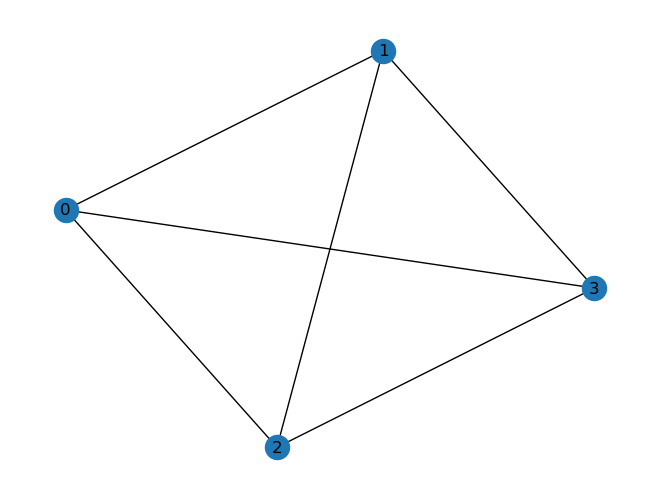

Iteration 0: 1 different colors
{0: ['0', '0', '0', '0'], 1: ['0', '0', '0', '0'], 2: ['0', '0', '0', '0'], 3: ['0', '0', '0', '0']}
Iteration 1: 1 different colors
{0: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d'], 1: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d'], 2: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d'], 3: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1

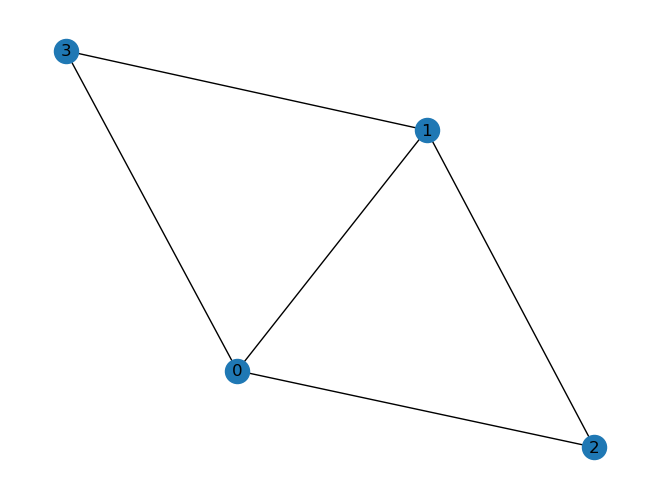

Iteration 0: 1 different colors
{0: ['0', '0', '0', '0'], 1: ['0', '0', '0', '0'], 2: ['0', '0', '0'], 3: ['0', '0', '0']}
Iteration 1: 2 different colors
{0: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 1: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 2: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31f25d8401be4a'], 3: ['adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'adc91e03060b42e7836bdfba7ce19b3bc1297d234fec44585472529d', 'c34adf3fda09c1b4fee705a40bd9fb4d7875f9718f31

In [4]:
n = 2

G = nx.Graph({0: [4], 1: [], 2: [], 3: [4], 4: [0, 3]})
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)

G = nx.Graph({0: [1,2], 1: [2,3]})
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)

G = nx.Graph({0: [1], 1: [2], 2: [3], 3: [0] })
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)

G = nx.Graph({0: [1], 1: [2], 2: [3]})
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)

G = nx.Graph({0: [1,2,3], 1: [2,3], 2: [3]})
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)

G = nx.Graph({0: [1,2,3], 1: [2,3]})
nx.draw(G, with_labels=True)
plt.show()
for i in range(1,n if n <= len(G.nodes()) else len(G.nodes())):
    kWL(G, i, verbose=True)



In [49]:
def base_WL(G_, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
    G, n = n_set(G_)
    colors = initial_colors_func(n)
    old_colors = copy.deepcopy(colors)
    for i in range(len(n)):
        for node in n:
            neigh_colors = "".join([colors[i][0] for i in find_neighbors_func(G, n, node)])
            # neigh_colors = "".join([old_colors[i][0] for i in find_neighbors_func(G, n, node)])
            colors[node].extend([neigh_colors])
            colors[node].sort()
        # Update with the hash
        colors = {i: [hashlib.sha224("".join(colors[i]).encode('utf-8')).hexdigest()] for i in colors}
        
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        
        old_colors = copy.deepcopy(colors)
    canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    if verbose:
        print(f'Canonical Form Found: \n {canonical_form} \n')
    return canonical_form

In [50]:
def WL(G, k=2, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        return G, list(G.nodes())
    
    def set_initial_colors(n):
        return {i: [hashlib.sha224("1".encode('utf-8')).hexdigest()] for i in n}
    
    def find_neighbors(G, n, node):
        return G.neighbors(node)
    
    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

In [51]:
def kWL(G, k, verbose=False):
    def n_set(G):
        # G = nx.convert_node_labels_to_integers(G)
        V = list(G.nodes())
        V_k = [comb for comb in itertools.combinations(V, k)]
        return G, V_k
    def set_initial_colors(n):
        return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}
    def find_neighbors(G, V_k, node):
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1]
    
    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

Converged at iteration 1!
Canonical Form Found: 
 [('290c720323300153979e7292093024b2aae7f96fbe563f77f802cc0a', 1), ('61349374c06c94c051696806a7435e37f8e781688d31536f97d94e6f', 1), ('ac14b7191700a2c81649d66a8f3478cc6ad1185ce2580b989d34ca7c', 1), ('d528fcd304df25e57ac901284f3d7c2e36d7ab867512817cc283e071', 1), ('df88b17638577a4a9e6d4f915aaf4b3b113b1c4fee1d3d3eca76ca77', 1), ('e5b90eba3b1d01aa12881b7a52477eb653e7dd33d4e399ba8b6d2508', 1)] 



[('290c720323300153979e7292093024b2aae7f96fbe563f77f802cc0a', 1),
 ('61349374c06c94c051696806a7435e37f8e781688d31536f97d94e6f', 1),
 ('ac14b7191700a2c81649d66a8f3478cc6ad1185ce2580b989d34ca7c', 1),
 ('d528fcd304df25e57ac901284f3d7c2e36d7ab867512817cc283e071', 1),
 ('df88b17638577a4a9e6d4f915aaf4b3b113b1c4fee1d3d3eca76ca77', 1),
 ('e5b90eba3b1d01aa12881b7a52477eb653e7dd33d4e399ba8b6d2508', 1)]

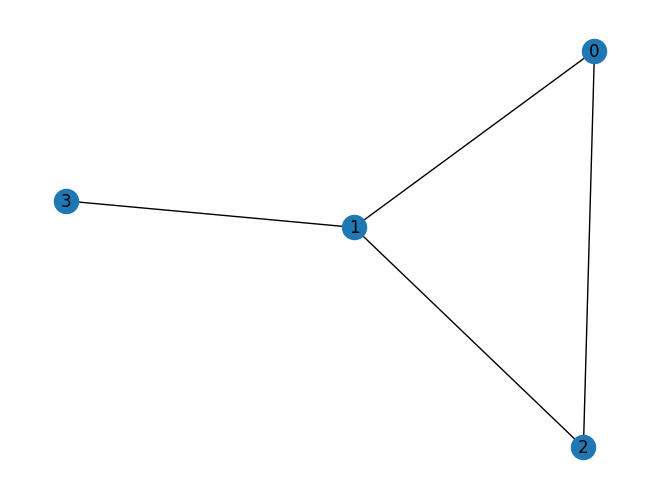

In [53]:
G = nx.Graph({0: [1,2], 1: [2,3]})
nx.draw(G, with_labels=True)
kWL(G, 2, verbose=True)
# WL(G, 2, verbose=True)

In [68]:
def kWL(G, k, verbose=False):
    def n_set(G):
        V = list(G.nodes())
        return list(itertools.combinations(V, k))
    def set_initial_colors(n):
        # return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}
        return {i: [nx.weisfeiler_lehman_graph_hash(G.subgraph(i))] for i in n}
    def find_neighbors(V_k, node):
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1]
    
    def base_WL(G, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
        N_set = n_set(G)
        colors = initial_colors_func(N_set)
        old_colors = copy.deepcopy(colors)
        for i in range(len(N_set)):
            for k_tuple in N_set:
                M_neigh_colors = "".join([colors[i][0] for i in find_neighbors_func(N_set, k_tuple)])
                # neigh_colors = "".join([old_colors[i][0] for i in find_neighbors_func(G, n, node)])
                colors[k_tuple].extend([M_neigh_colors])
                colors[k_tuple].sort()
            # Update with the hash
            colors = {k_tuple_color: [hashlib.sha224("".join(colors[k_tuple_color]).encode('utf-8')).hexdigest()] for k_tuple_color in colors}
            
            if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
                if verbose:
                    print(f'Converged at iteration {i}!')
                break
            
            old_colors = copy.deepcopy(colors)
        canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
        if verbose:
            print(f'Canonical Form Found: \n {canonical_form} \n')
        return canonical_form
    
    
    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

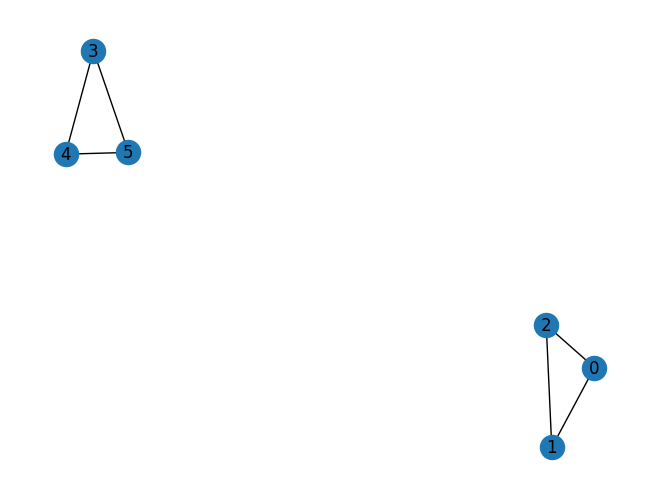

{(0, 1): (1, 0), (0, 3): (3, 0), (0, 4): (4, 0), (0, 2): (2, 0), (0, 5): (5, 0), (1, 3): (3, 1), (1, 4): (4, 1), (1, 2): (2, 1), (1, 5): (5, 1), (3, 4): (4, 3), (3, 2): (2, 3), (3, 5): (5, 3), (4, 2): (2, 4), (4, 5): (5, 4), (2, 5): (5, 2)}
[(0, 1), (0, 3), (0, 4), (0, 2), (0, 5), (1, 3), (1, 4), (1, 2), (1, 5), (3, 4), (3, 2), (3, 5), (4, 2), (4, 5), (2, 5)]
{(0, 1): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (0, 3): ['3a47016fb6460775830c7b9fd43bde50'], (0, 4): ['3a47016fb6460775830c7b9fd43bde50'], (0, 2): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (0, 5): ['3a47016fb6460775830c7b9fd43bde50'], (1, 3): ['3a47016fb6460775830c7b9fd43bde50'], (1, 4): ['3a47016fb6460775830c7b9fd43bde50'], (1, 2): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (1, 5): ['3a47016fb6460775830c7b9fd43bde50'], (3, 4): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (3, 2): ['3a47016fb6460775830c7b9fd43bde50'], (3, 5): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (4, 2): ['3a47016fb6460775830c7b9fd43bde50'], (4, 5): ['3ba4ffe16dfe637510ed1c3676ec6

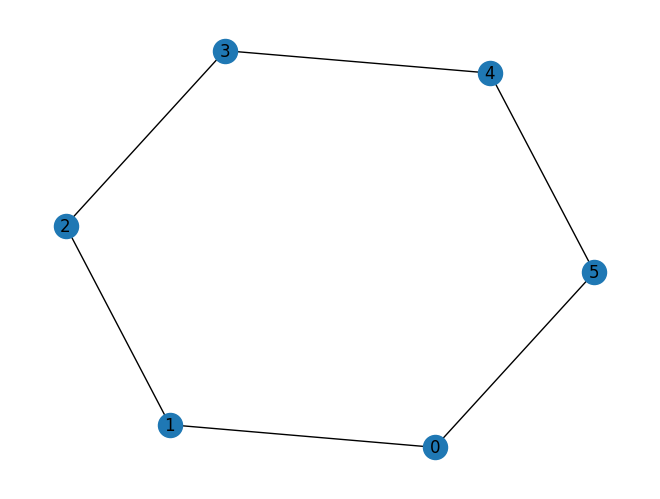

{(0, 1): (1, 0), (0, 2): (2, 0), (0, 3): (3, 0), (0, 4): (4, 0), (0, 5): (5, 0), (1, 2): (2, 1), (1, 3): (3, 1), (1, 4): (4, 1), (1, 5): (5, 1), (2, 3): (3, 2), (2, 4): (4, 2), (2, 5): (5, 2), (3, 4): (4, 3), (3, 5): (5, 3), (4, 5): (5, 4)}
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
{(0, 1): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (0, 2): ['3a47016fb6460775830c7b9fd43bde50'], (0, 3): ['3a47016fb6460775830c7b9fd43bde50'], (0, 4): ['3a47016fb6460775830c7b9fd43bde50'], (0, 5): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (1, 2): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (1, 3): ['3a47016fb6460775830c7b9fd43bde50'], (1, 4): ['3a47016fb6460775830c7b9fd43bde50'], (1, 5): ['3a47016fb6460775830c7b9fd43bde50'], (2, 3): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (2, 4): ['3a47016fb6460775830c7b9fd43bde50'], (2, 5): ['3a47016fb6460775830c7b9fd43bde50'], (3, 4): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (3, 5): ['3a47016fb6460775830c7b9fd43bd

[('6136e5a8af353967bec51535b28e053bc25302a2d76addd3d8c96efb', 18),
 ('b5656ab303f0f85912b1b5f18f68da68962e682519d86f82ef9e55ab', 12)]

In [8]:
G = nx.Graph({0: [1,2], 1: [2], 3:[4,5], 4:[5]})
G_cycle = nx.Graph({0: [1], 1: [2], 2:[3], 3:[4], 4:[5], 5:[0]})
nx.draw(G, with_labels=True)
plt.show()
kWL(G, 2, verbose=True)
nx.draw(G_cycle, with_labels=True)
plt.show()
kWL(G_cycle, 2, verbose=True)

# WL dimension of $PAut(\Gamma)$

[∅, [2 5), [4 3), (1), [0 2), [5 0), [3 5), [1 4), [2 1), [0 3), [4 5), [2 4), [1 0), [3 1), [5 2), [3 4), [2 0), [4 1), [0 5), [5 3), (4), [1 2), [3 0), [0 1), [1 3), (2), [4 0), (5), [0 4), [2 3), [3 2), [5 1), (0), [1 5), (3), [4 2), [5 4), [2 5)[3 0), [3 4)(5), [1 4)[2 5), [3 1 5), [0 5)[1 3), [4 1)[5 2), [0 4)[1 5), [1 2)[4 5), [1 5)[2 3), [0 1)[5 3), [1 3 2), [1 2)(4), [2 0)[3 4), [2 0)[4 3), [0 2)[3 5), [0 2)(1), [1 5 0), [2 3)[4 0), [0 4 1), [3 5)(4), [0 3)[1 5), [0 2)(5), [3 1)[5 2), [0 2)[5 4), (1)(2), [1 2)[4 3), [0 1)[3 5), [0 5)[4 1), [2 3 1), [5 0 4), [1 0)[3 4), [1 0)[4 3), [0 2)(3), [2 1)[3 4), [2 0)(5), [2 4)[5 1), [0 1 2), [0 4)[2 5), (0)(3), [3 0)[4 1), [0 4)[3 1), [2 0)[3 5), [1 5)[3 2), [1 5)[2 4), [1 4)[3 2), [3 2 5), [0 2)[5 3), [2 1)[5 4), [2 5 1), [3 2)[4 1), (0)(4), [5 3)(0), [1 4 0), [0 5)[3 1), [0 3)[4 1), (3)(4), [3 1)[5 0), [4 2)[5 0), [0 1)(2), [1 0)[3 5), (0 2), [2 1)(5), [2 5)[3 1), [4 5)(3), [5 1 4), [5 3 4), [0 5)[4 2), [1 3 0), [5 4)(1), (2 3), [0 2)

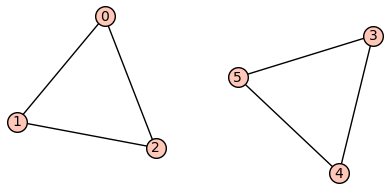

73441
("Initial colors: [('beige', 51), ('blue', 426), ('brown', 4428), ('coral', "
 "354), ('cyan', 354), ('gray', 354), ('green', 99), ('grey', 111), "
 "('lavender', 48), ('lime', 240), ('magenta', 240), ('maroon', 4428), "
 "('mint', 354), ('navy', 360), ('orange', 264), ('pink', 60696), ('purple', "
 "201), ('red', 262), ('teal', 30), ('yellow', 141)]")
{'green', 'lime', 'maroon', 'beige', 'navy', 'mint', 'blue', 'yellow', 'brown', 'cyan', 'orange', 'lavender', 'magenta', 'purple', 'pink', 'gray', 'red', 'teal', 'grey', 'coral'}
green (∅, (1)) [∅, ∅, ∅, (1)] ['empty', 'vertex']
maroon ((1), [2 5)) [(1), ∅, ∅, ∅] ['vertex', 'vertex']
beige ((1), ∅) [(1), ∅, ∅, ∅] ['vertex', 'empty']
navy ((1), (4)) [(1), ∅, ∅, (4)] ['vertex', 'vertex']
mint ((1), [1 4)) [(1), ∅, [1 4), ∅] ['vertex', 'vertex']
blue (∅, [2 5)) [∅, ∅, ∅, ∅] ['empty', 'vertex']
yellow (∅, [3 4)(5)) [∅, ∅, ∅, (5)] ['empty', 'edge']
brown ([2 5), (1)) [∅, ∅, ∅, (1)] ['vertex', 'vertex']
cyan ([2 5), (5)) [∅, ∅, [2 5), (5

KeyboardInterrupt: 

In [38]:
import copy
import hashlib
import itertools
import pprint
from collections import Counter, defaultdict
import networkx as nx
from partial_symmetries import PAUT_up_to
from graph import Graph

def reencode_colors_to_strings(colors):
    """
    Re-encode the colors to be strings of colors usable in NetworkX.
    
    Parameters:
    colors (dict): A dictionary mapping each node to its color.
    
    Returns:
    dict: A dictionary mapping each node to its new string color.
    """
    color_palette = [
        "red", "blue", "green", "yellow", "purple", "orange", "pink", "brown", "gray", "cyan",
        "magenta", "lime", "teal", "lavender", "beige", "maroon", "mint", "coral", "navy", "grey",
    ]
    
    color_to_str = {}
    str_color_counter = 0
    
    for node, color in colors.items():
        color_str = str(color)  # Ensure the color is treated as a string
        if color_str not in color_to_str:
            color_to_str[color_str] = color_palette[str_color_counter % len(color_palette)]
            str_color_counter += 1
    
    str_colors = {node: color_to_str[str(color)] for node, color in colors.items()}
    
    return str_colors


def group_wl_initial_colors(G, k):
    """
    Assign initial colors to k-tuples of elements from the (semi)group G based on equality and product structure.
    
    Parameters:
    G (list): List of elements in the (semi)group.
    k (int): Size of tuples.
    
    Returns:
    dict: Initial color assignment for each k-tuple.
    """
    colors = {}
    for g_tuple in itertools.product(G, repeat=k):
        # Define the initial color based on equality and product conditions
        equality_pattern = tuple((i, j) for i in range(k) for j in range(i+1, k) if g_tuple[i] == g_tuple[j])
        product_pattern = tuple((i, j, m) for i in range(k) for j in range(k) for m in range(k) if g_tuple[i] * g_tuple[j] == g_tuple[m])
        
        # Combine equality and product patterns into a single hashable structure
        colors[g_tuple] = (equality_pattern, product_pattern)
    return colors

def group_wl_refine_colors(G, k, colors):
    """
    Refine the colors of k-tuples of elements from the (semi)group G.
    
    Parameters:
    G (list): List of elements in the (semi)group.
    k (int): Size of tuples.
    colors (dict): Current color assignment for each k-tuple.
    
    Returns:
    dict: Refined color assignment for each k-tuple.
    """
    new_colors = {}
    for g_tuple in itertools.product(G, repeat=k):
        # Collect the current color
        tuple_color = colors[g_tuple]
        
        # Construct the multiset of neighbor colors by replacing each position with every element in G
        neighbor_colors = []
        for i in range(k):
            for x in G:
                modified_tuple = list(g_tuple)
                modified_tuple[i] = x
                modified_tuple = tuple(modified_tuple)
                neighbor_colors.append(colors[modified_tuple])
        
        # Sort the neighbor colors to create a canonical representation and append to tuple color
        neighbor_colors = tuple(sorted(neighbor_colors))
        combined_color = (tuple_color, neighbor_colors)
        
        # Hash the combined color to create a unique identifier
        new_colors[g_tuple] = hashlib.sha224(str(combined_color).encode('utf-8')).hexdigest()
    
    return new_colors

def group_wl_algorithm(G, graph, k, max_iterations=10, verbose=False):
    """
    Run the Weisfeiler-Leman algorithm for (semi)groups on k-tuples of elements in G.
    
    Parameters:
    G (list): List of elements in the (semi)group.
    k (int): Size of tuples.
    max_iterations (int): Maximum number of iterations.
    verbose (bool): Whether to print details at each iteration.
    
    Returns:
    dict: Final color assignment for each k-tuple.
    """
    colors = group_wl_initial_colors(G, k)
    old_colors = None
    
    print(len(colors))
    
    colors_reencoded = reencode_colors_to_strings(colors)
    canonical_form = sorted(Counter([item for item in colors_reencoded.values()]).items())
    
    # from each colors only print the first element
    if verbose:
        pprint.pprint(f"Initial colors: {canonical_form}")
        
        clrs = set(list(colors_reencoded.values()))
        print(clrs)
        for clr in clrs:
            for k_tuple, clr_ in colors_reencoded.items():
                if clr == clr_ and (k_tuple[0].is_identity() or k_tuple[1].is_identity()):
                    print(clr, k_tuple, [i * j for i in k_tuple for j in k_tuple], ['vertex' if len(i) == 1 else 'empty' if len(i) == 0 else 'edge' if i.dom in graph.edges() else  'nonedge' for i in k_tuple ])
                    break        
            
    
    n = len(set(colors.values()))
    
    for iteration in range(max_iterations):
        if verbose:
            print(f"Iteration {iteration}: {len(set(colors.values()))} unique colors")
        
        # Refine colors
        new_colors = group_wl_refine_colors(G, k, colors)
        
        # Check for stability
        if new_colors == colors:
            if verbose:
                print(f"Converged at iteration {iteration}")
            break
        
        # Update colors
        colors = new_colors
        
        n_new = len(set(colors.values()))
        if n == n_new:
            print(f"Converged at iteration {iteration}")
            break
        n = n_new
        
        old_colors = copy.deepcopy(colors)
    
    colors = reencode_colors_to_strings(colors)
    
    return colors

# Example usage
if __name__ == "__main__":
    # Define a group G (example: integers modulo 5 under addition)
    # g1 = Graph(nx.Graph({0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5:[0]})) # 6-cycle
    # g1 = Graph(nx.Graph({0: [1], 1: [2]}))
    # PAut_1 = list(PAUT_up_to(g1, 2))
    
    
    # print(PAut_1)
    # print(len(PAut_1))
    # g1.show()
        
    # # Run the WL algorithm for k-tuples in this group
    # final_colors = group_wl_algorithm(PAut_1, k=2, verbose=True)
    # canonical_form = sorted(Counter([item for item in final_colors.values()]).items())
    
    # pprint.pprint(canonical_form)
    # # Output final colors
    # pprint.pprint(final_colors)
    
    g2 = Graph(nx.Graph({0: [1], 1: [2], 2: [0], 3: [4], 4: [5], 5:[3]})) # 2x triangles
    PAut_2 = list(PAUT_up_to(g2, 2))
    print(PAut_2)
    print(len(PAut_2))
    g2.show()
    # Run the WL algorithm for k-tuples in this group
    final_colors = group_wl_algorithm(PAut_2, g2, k=2, verbose=True)
    canonical_form = sorted(Counter([item for item in final_colors.values()]).items())
    
    pprint.pprint(canonical_form)
    # Output final colors
    # pprint.pprint(final_colors)


# size of monoid

In [7]:
G_cycle = nx.Graph({0: [1], 1: [2], 2:[3], 3:[4], 4:[5], 5:[]})
# G_cycle = nx.Graph({0: [1], 1: [2], 2:[3], 3:[4], 4:[5], 5:[0]})
# G_cycle = nx.Graph({0: [1], 1: [2], 2:[3], 3:[4], 4:[5], 5:[0]})
# G_cycle = nx.complete_graph(6)

# draw_inverse_monoid(Graph(G_cycle),depths=[0])

plt.show()
colors, _  = kWL(G_cycle, 3, verbose=True)

initial colors: 
{(0, 1, 2): ['5144181ac27497fdfa9bdb5b8b799630'], (0, 1, 3): ['8a5dc9be309c81780f6428266fc77bbc'], (0, 1, 4): ['8a5dc9be309c81780f6428266fc77bbc'], (0, 1, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (0, 2, 3): ['8a5dc9be309c81780f6428266fc77bbc'], (0, 2, 4): ['ebed2b2f1ddd19051c3f8f1e6db408b8'], (0, 2, 5): ['ebed2b2f1ddd19051c3f8f1e6db408b8'], (0, 3, 4): ['8a5dc9be309c81780f6428266fc77bbc'], (0, 3, 5): ['ebed2b2f1ddd19051c3f8f1e6db408b8'], (0, 4, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (1, 2, 3): ['5144181ac27497fdfa9bdb5b8b799630'], (1, 2, 4): ['8a5dc9be309c81780f6428266fc77bbc'], (1, 2, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (1, 3, 4): ['8a5dc9be309c81780f6428266fc77bbc'], (1, 3, 5): ['ebed2b2f1ddd19051c3f8f1e6db408b8'], (1, 4, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (2, 3, 4): ['5144181ac27497fdfa9bdb5b8b799630'], (2, 3, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (2, 4, 5): ['8a5dc9be309c81780f6428266fc77bbc'], (3, 4, 5): ['5144181ac27497fdfa9bdb5b8b799630']}
{(

In [8]:
from itertools import combinations, combinations_with_replacement, permutations

def estimate_partial_automorphisms(colors, l):
    """
    Estimate the number of partial automorphisms of rank l by comparing
    all l-vertex subsets with matching colors.
    
    Args:
    - colors (dict): A dictionary where the key is the vertex label and the value is its color.
    - l (int): The rank of the partial automorphism (number of vertices to consider).
    
    Returns:
    - int: An estimate of the number of partial automorphisms of rank l.
    """
    # Get all vertices
    vertices = list(colors.keys())
    
    # Generate all l-vertex subsets
    l_subsets_ = list(permutations(vertices, int(l)))
    l_subsets = list(combinations(vertices, l))
    
    # Initialize the count of possible partial automorphisms
    partial_automorphisms_count = 0
    
    # Compare every pair of l-subsets
    for i, subset1 in enumerate(l_subsets_):
        # Get the colors of the first subset
        subset1_colors = [colors[v][0] for v in subset1]
        
        for subset2 in l_subsets_:
            # Get the colors of the second subset
            subset2_colors = [colors[v][0] for v in subset2]
            
            # If the colors match, this could be a partial automorphism
            if subset1_colors == subset2_colors:
                partial_automorphisms_count += 1
    
    return partial_automorphisms_count

# Example usage
# colors = {
#     'A': 1,
#     'B': 2,
#     'C': 1,
#     'D': 2,
#     'E': 3,
#     'F': 1,
#     'G': 2
# }

l = 1
estimate = estimate_partial_automorphisms(colors, l)
print(f"Estimated number of partial automorphisms of rank {l}: {estimate}")
true = len(PAut_level(G_cycle,len(G_cycle)-l))
print(f"True number of partial automorphisms of rank {l}: {true}")


Estimated number of partial automorphisms of rank 1: 1440


True number of partial automorphisms of rank 1: 36


In [118]:
['A','B'] == ['B','A']

False

In [21]:
from itertools import combinations, combinations_with_replacement

def estimate_partial_automorphisms(colors, l):
    """
    Estimate the number of partial automorphisms of rank l by comparing
    all l-vertex subsets with matching colors.
    
    Args:
    - colors (dict): A dictionary where the key is the vertex label and the value is its color.
    - l (int): The rank of the partial automorphism (number of vertices to consider).
    
    Returns:
    - int: An estimate of the number of partial automorphisms of rank l.
    """
    # Generate all l-vertex subsets

    
    # Initialize the count of possible partial automorphisms
    partial_automorphisms_count = 0
    
    for subset1 in colors.keys():
        for subset2 in colors.keys():
    
            print(subset1, subset2, end=": ")
            # If the colors match, this could be a partial automorphism
            if colors[subset1][0] == colors[subset2][0]:
                print("y")
                partial_automorphisms_count += 1
            else:
                print(" ")
    
    return partial_automorphisms_count

l = 2
colors, _  = kWL(G_cycle, l, verbose=True)
print(len(colors))
# print(colors)

estimate = estimate_partial_automorphisms(colors, l)
print(f"Estimated number of partial automorphisms of rank {l}: {estimate}")
true = len(PAut_level(G_cycle,len(G_cycle)-l))
print(f"True number of partial automorphisms of rank {l}: {true}")


initial colors: 
{(0, 1): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (0, 2): ['3a47016fb6460775830c7b9fd43bde50'], (0, 3): ['3a47016fb6460775830c7b9fd43bde50'], (0, 4): ['3a47016fb6460775830c7b9fd43bde50'], (0, 5): ['3a47016fb6460775830c7b9fd43bde50'], (1, 2): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (1, 3): ['3a47016fb6460775830c7b9fd43bde50'], (1, 4): ['3a47016fb6460775830c7b9fd43bde50'], (1, 5): ['3a47016fb6460775830c7b9fd43bde50'], (2, 3): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (2, 4): ['3a47016fb6460775830c7b9fd43bde50'], (2, 5): ['3a47016fb6460775830c7b9fd43bde50'], (3, 4): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (3, 5): ['3a47016fb6460775830c7b9fd43bde50'], (4, 5): ['3ba4ffe16dfe637510ed1c3676ec6cb0']}
{(0, 1): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (0, 2): ['3a47016fb6460775830c7b9fd43bde50'], (0, 3): ['3a47016fb6460775830c7b9fd43bde50'], (0, 4): ['3a47016fb6460775830c7b9fd43bde50'], (0, 5): ['3a47016fb6460775830c7b9fd43bde50'], (1, 2): ['3ba4ffe16dfe637510ed1c3676ec6cb0'], (1, 3): ['3a470

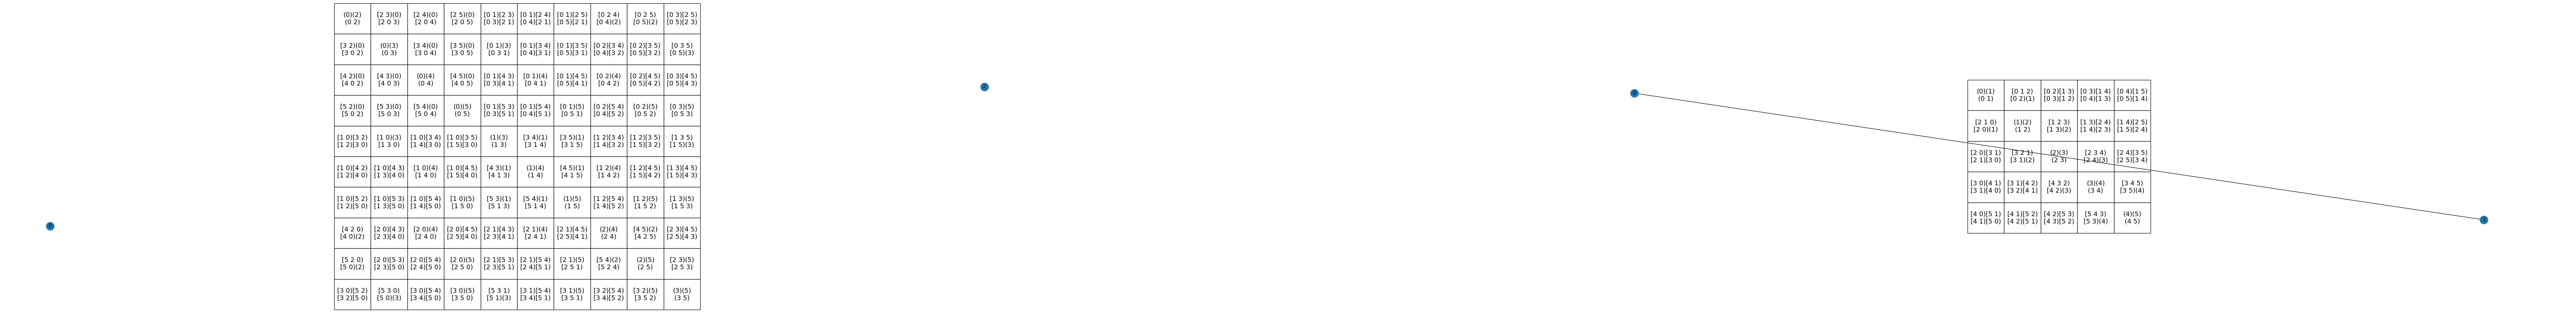

In [12]:
draw_inverse_monoid(Graph(G_cycle),depths=[len(G_cycle)-l])